# Image Classification -- Athena Demo #

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

keras is a high-level neural networks library that is running on the top of TensorFlow, CNTK, and Theano. Using Keras in deep learning allows for easy and fast prototyping as well as running seamlessly on CPU and GPU.


Steps:
1. examine and understand data
2. build an input pipeline
3. build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

In [32]:
#!pip install tensorflow
#!pip install Pillow
#!pip install keras

In [88]:
import os
import PIL
from PIL import Image
import numpy as np
from numpy import asarray

import matplotlib.pyplot as plt
from matplotlib import image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [7]:
mnist = tf.keras.datasets.mnist #imported sample dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

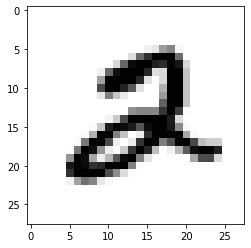

In [8]:
plt.imshow(x_train[5],cmap = plt.cm.binary)
plt.show()

In [9]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

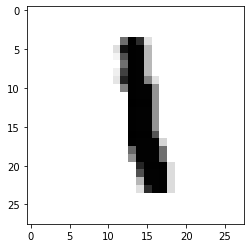

In [10]:
plt.imshow(x_train[6], cmap = plt.cm.binary)
plt.show()

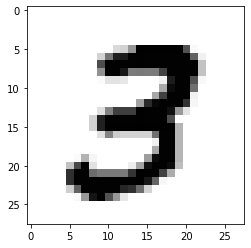

In [11]:
plt.imshow(x_train[7], cmap = plt.cm.binary)
plt.show()

In [12]:
a = [[0, 0, 0, 0, 0], 
     [199, 0, 0, 0, 0],
     [180, 230, 100, 0, 0],
     [170, 255, 190, 0, 0],
     [0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0], ]

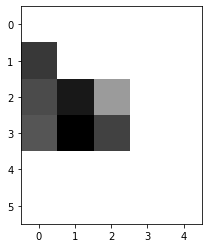

In [13]:
plt.imshow(a, cmap = plt.cm.binary)

In [89]:
#first method of importing image data
path = 'C:/Users/athen/Documents/GitHub/shapes/circle/0.png'
path1 = 'pikachu.jpg'

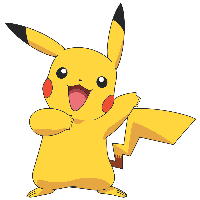

In [90]:
image1 = Image.open(path1).resize((200, 200))
image1

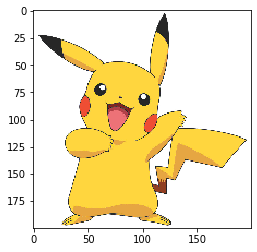

In [92]:
plt.imshow(np.asarray(image1))

In [103]:
image2 = image.imread(path1)
image2.shape

(1000, 1000, 3)

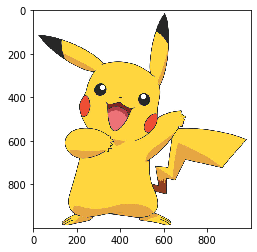

In [100]:
plt.imshow(image2)

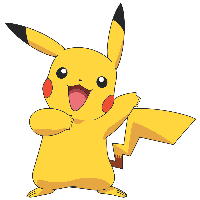

In [109]:
image3 = load_img(path1).resize((200, 200))
image3

In [116]:
image3_arr = img_to_array(image3)
image3_arr

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [118]:
batch_size = 32
img_height = 200
img_width = 200
path = 'C:/Users/athen/Documents/GitHub/shapes'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14970 files belonging to 4 classes.
Using 11976 files for training.


In [119]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 14970 files belonging to 4 classes.
Using 2994 files for validation.


In [57]:
class_names = train_ds.class_names
class_names

['circle', 'square', 'star', 'triangle']

In [56]:
for images, labels in train_ds.take(1):
    print(labels)

tf.Tensor([0 1 1 2 0 3 0 1 0 2 1 3 0 1 2 0 1 1 2 0 3 1 3 2 2 2 2 1 2 0 0 3], shape=(32,), dtype=int32)


C:\Users\athen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


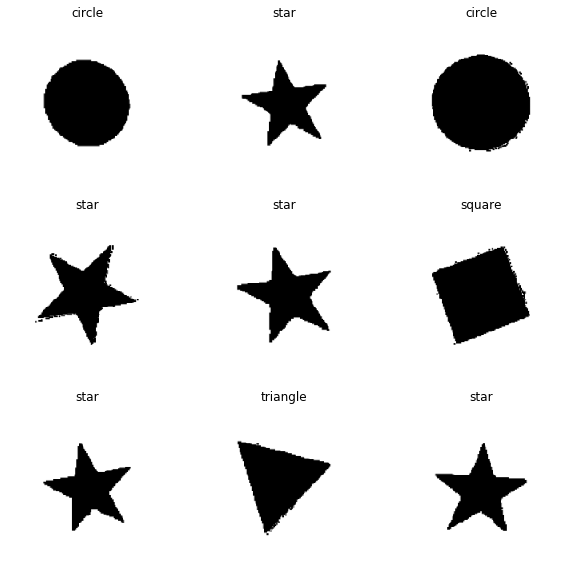

In [53]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")